# Homework 5
### Oviya Adhan

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.manifold import MDS
from scipy.spatial.distance import squareform

In [2]:
#Pre-processing 
data = np.genfromtxt('wines.csv', delimiter=',')
print(data.shape)

file = pd.read_csv('wines.csv')
df = pd.DataFrame(file)
df

(179, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.isnull().values.any() #False, confirming no NaN values

False

In [4]:
df.dtypes

Alcohol            float64
Malic_Acid         float64
Ash                float64
Ash_Alkalinity     float64
Magnesium            int64
Total_Phenols      float64
Flavonoids         float64
Stilbenes          float64
Proanthocyanins    float64
Color_Intensity    float64
Hue                float64
OD280              float64
Proline              int64
dtype: object

## 1. PCA

In [5]:
#Create array with only data points (excluding dimensions/features/labels row)
X = data[1:] 
print(X.shape)
print(X)

#Fit PCA to X
pca = PCA(n_components=13, whiten=True)
pca.fit(X)

#Compute transformed data
X_pca = pca.transform(X)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


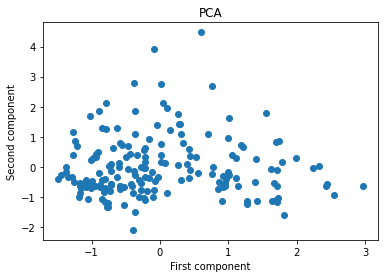

In [6]:
#2D plot
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA');

In [7]:
#Variance explained by first two dimensions
explained_variance = pca.explained_variance_ratio_
print('Variance explained by first dimension (alcohol content): ',explained_variance[0])
print('Variance explained by second dimension (malic acid): ',explained_variance[1])

Variance explained by first dimension (alcohol content):  0.9980912304918974
Variance explained by second dimension (malic acid):  0.0017359156247057483


In [8]:
#Collect eigenvalues
eigenvalues = pca.explained_variance_
print(eigenvalues)

above_1 = 0

for i in eigenvalues:
    if i > 1:
        above_1 += 1
      
print('Number of eigenvalues above 1: ', above_1)

[9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 7.17026032e-02 3.75759789e-02 2.10723661e-02
 8.20370314e-03]
Number of eigenvalues above 1:  5


## 2. t-SNE

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150]
[0.22371220588684082, 0.15966910123825073, 0.14987240731716156, 0.12795545160770416, 0.1144159659743309, 0.10459382832050323, 0.09263506531715393, 0.08376939594745636, 0.07636134326457977, 0.0684344545006752, 0.058867573738098145, 0.052065376192331314, 0.044454798102378845, 0.0361977145075798, 0.033278822898864746, 0.02495904266834259, 0.02396688237786293, 0.02018190547823906, 0.01728009805083275, 0.015076451003551483, 0.013099828734993935, 0.010716124437749386, 0.009530017152428627, 0.007373441476374865, 0.006095021031796932, 0.0045182788744568825, 0.003320007584989071, 0.002262834459543228, 0.001462307758629322, 0.0014540115371346474]


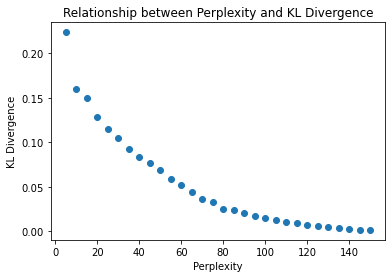

In [9]:
warnings.filterwarnings("ignore")

#List of perplexities to test (5 - 150, every 5)
perplexities = list(range(5,151,5))
print(perplexities)

#Empty list for kl divergence
kl_divergences = []

#Iterate through each perplexity, fit model, calculate kl divergence, and add to kl divergence list
for i in perplexities:
    tsne = TSNE(perplexity = i, random_state = 1000)
    tX = tsne.fit_transform(X)
    kl = tsne.kl_divergence_
    kl_divergences.append(kl)
    
print(kl_divergences)

#Plot perplexity and kl_divergences
plt.scatter(perplexities, kl_divergences)
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.title('Relationship between Perplexity and KL Divergence');

In [10]:
#Fit t-SNE to X and compute and return transformed data
X_tsne = TSNE(perplexity = 20).fit_transform(X)
X_tsne.shape

(178, 2)

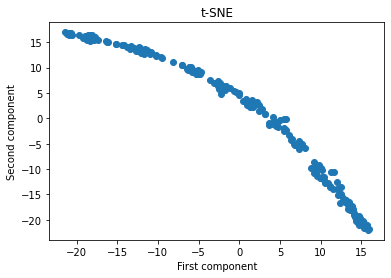

In [11]:
#2D plot
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('t-SNE');

## 3. MDS

In [38]:
mds = MDS(n_components=2, n_init=100, max_iter = 10000, dissimilarity='euclidean') #Create the mds object
#Components: Looking for a 2D solution, n_init: Number of runs with random initial starting positions, max_iter: Max number of iterations per run, dissimilarity: We already did it, from out distance matrix, 
mdsSolution = mds.fit_transform(X) #Actually run the mds

wineFeatures = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alkalinity', 'Magnesium',
       'Total_Phenols', 'Flavonoids', 'Stilbenes', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline']

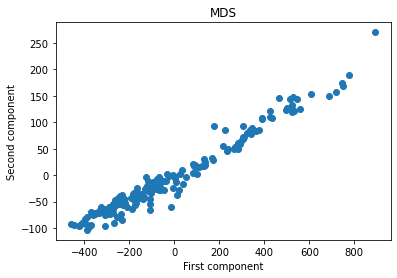

In [39]:
#Plot 
plt.scatter(mdsSolution[:,0], mdsSolution[:,1]) #Making the plot, first 2 dimensions
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('MDS');
#for ii in range(len(mdsSolution)):
#    plt.text(mdsSolution[ii,0], mdsSolution[ii,1],wineFeatures[ii]);


In [40]:
# Stress of embedding
print(mds.stress_)
print(mds.embedding_)

16854.31264174687
[[ 3.05190675e+02  9.20272993e+01]
 [ 2.96169137e+02  6.51825719e+01]
 [ 4.23945032e+02  1.10591725e+02]
 [ 7.16147574e+02  1.57524423e+02]
 [-6.29743453e+00 -2.34843451e+01]
 [ 6.87360836e+02  1.48555300e+02]
 [ 5.29402625e+02  1.21694002e+02]
 [ 5.28415418e+02  1.47439323e+02]
 [ 2.92091658e+02  6.07371215e+01]
 [ 2.92364163e+02  5.96447231e+01]
 [ 7.43217279e+02  1.73493567e+02]
 [ 5.18374247e+02  1.24782030e+02]
 [ 5.59646398e+02  1.24393112e+02]
 [ 3.88489310e+02  1.08189042e+02]
 [ 7.77582262e+02  1.88961658e+02]
 [ 5.44848665e+02  1.43072567e+02]
 [ 5.13847216e+02  1.43660499e+02]
 [ 3.73962329e+02  8.46983786e+01]
 [ 8.92912048e+02  2.69835987e+02]
 [ 9.75813066e+01  1.55991598e+01]
 [ 3.89577265e+01 -1.76189617e+01]
 [ 2.34204582e+01  1.34259674e+00]
 [ 2.81762074e+02  6.08713949e+01]
 [ 2.63974631e+02  4.93121334e+01]
 [ 1.00276800e+02  1.84609312e+00]
 [ 8.09863772e+01  2.16210293e+01]
 [ 4.34862931e+02  1.08535749e+02]
 [ 5.24740699e+02  1.19531274e+02]
 [

## 4. Choice w/ Silhoutte Method

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


For n_clusters = 2 The average silhouette_score is : 0.6572292778621516
For n_clusters = 3 The average silhouette_score is : 0.5721501323794438
For n_clusters = 4 The average silhouette_score is : 0.5625363926874349
For n_clusters = 5 The average silhouette_score is : 0.5509142987916702
For n_clusters = 6 The average silhouette_score is : 0.5666160831530523


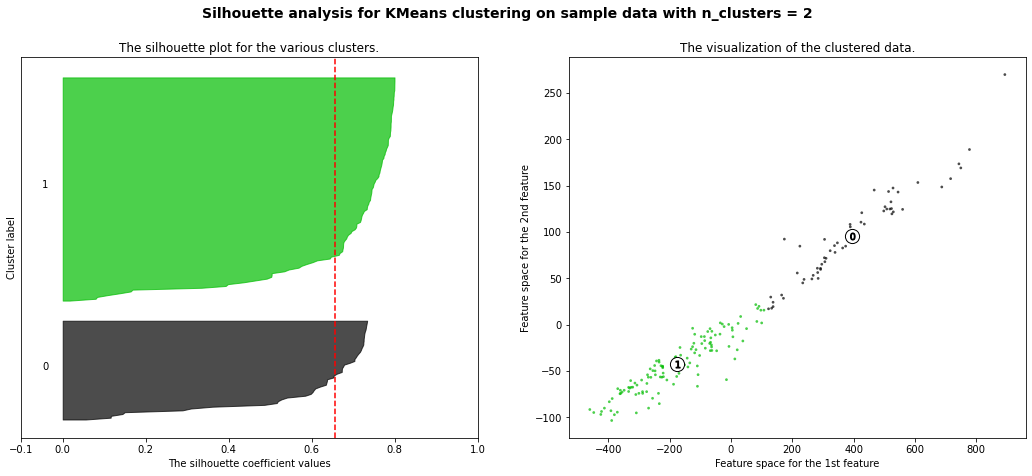

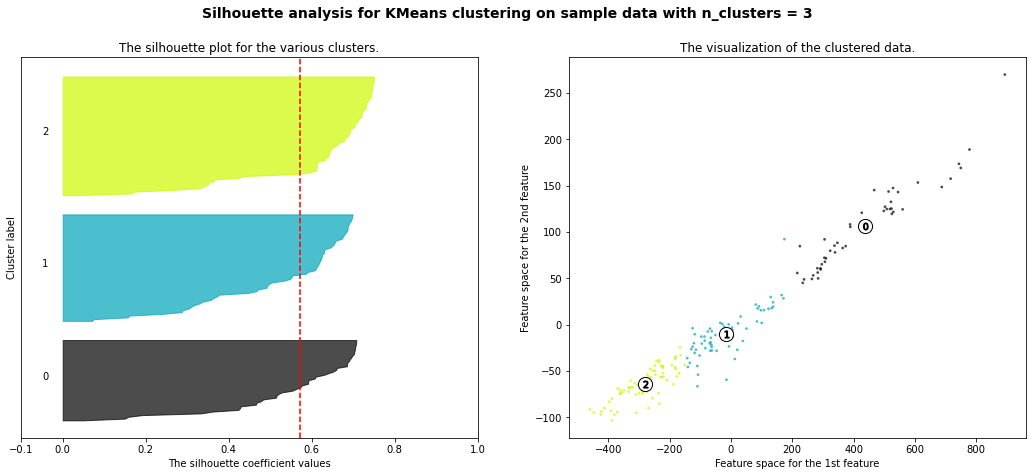

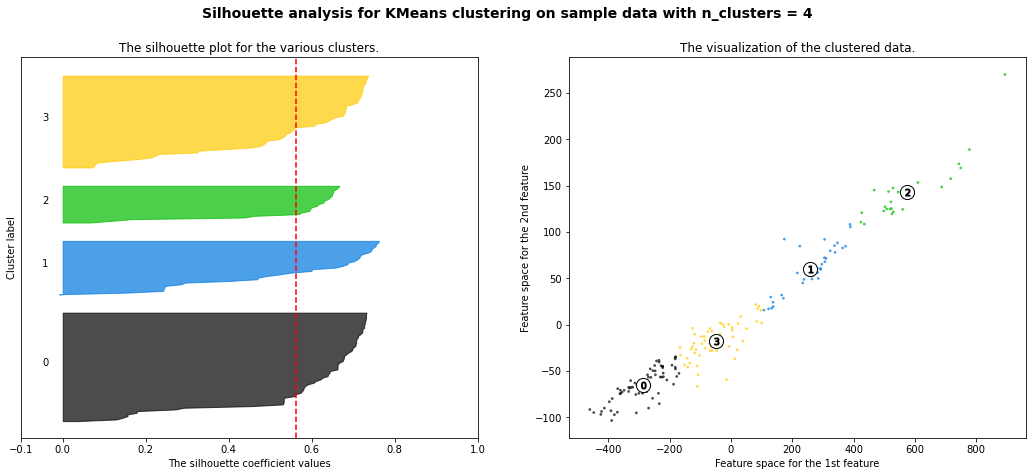

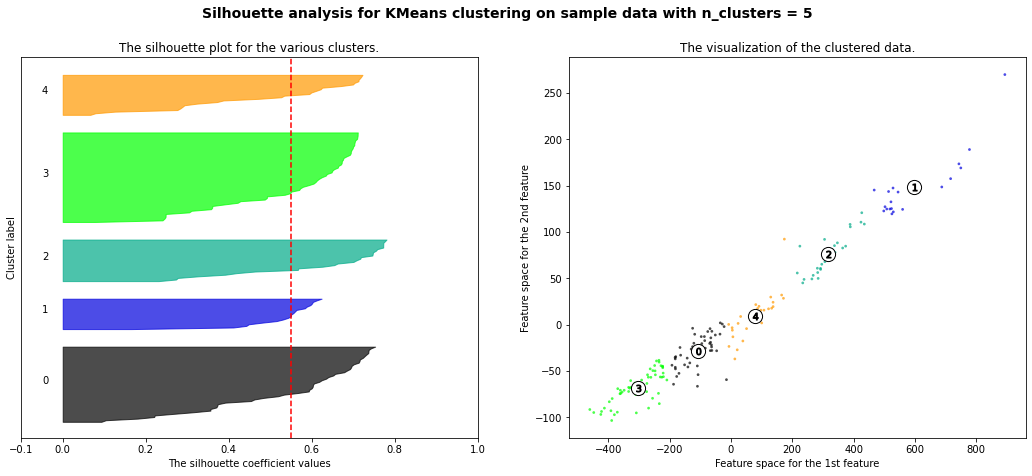

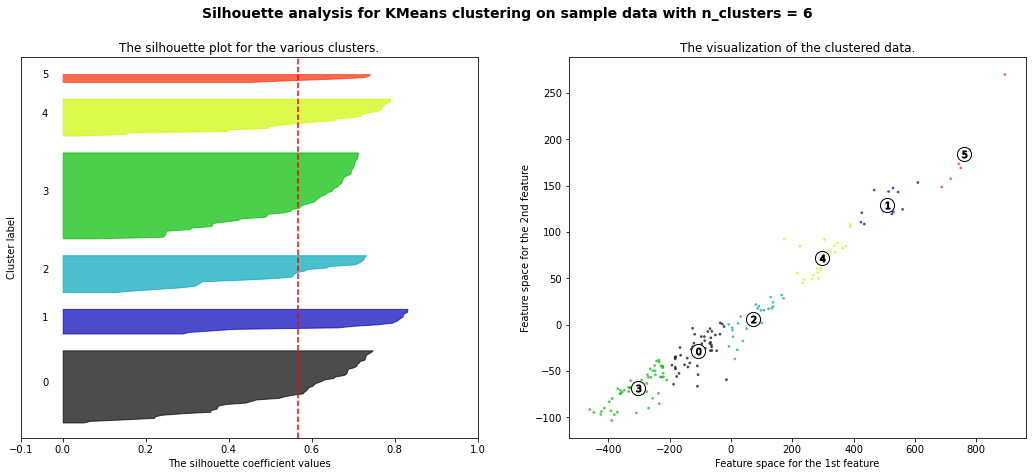

In [49]:
range_n_clusters = [2, 3, 4, 5, 6]

Xs = mdsSolution

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xs) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Xs)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xs, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xs, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Xs[:, 0], Xs[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## 5. Choice w/ dBScan

In [50]:
## DBSCAN Algorithm
def region_query (p, eps, X):
    # These lines check that the inputs `p` and `X` have
    # the right shape.
    _, dim = X.shape
    assert (p.shape == (dim,)) or (p.shape == (1, dim)) or (p.shape == (dim, 1))
    
    ### BEGIN SOLUTION
    return np.linalg.norm (p - X, axis=1) <= eps
    ### END SOLUTION

def index_set (y):
    """
    Given a boolean vector, this function returns
    the indices of all True elements.
    """
    assert len (y.shape) == 1

    ### BEGIN SOLUTION
    return set (np.where (y)[0])
    ### END SOLUTION

def find_neighbors (eps, X):
    m, d = X.shape
    neighbors = [] # Empty list to start
    ### BEGIN SOLUTION
    for i in range (len (X)):
        n_i = index_set (region_query (X[i, :], eps, X))
        neighbors.append (n_i)
    ### END SOLUTION
    assert len (neighbors) == m
    return neighbors

def find_core_points (s, neighbors):
    assert type (neighbors) is list
    assert all ([type (n) is set for n in neighbors])
    
    core_set = set ()
    ### BEGIN SOLUTION
    for i, n_i in enumerate (neighbors):
        if len (n_i) >= s:
            core_set.add (i)
    ### END SOLUTION
    return core_set

def expand_cluster (p, neighbors, core_set, visited, assignment):
    # Assume the caller performs Steps 1 and 2 of the procedure.
    # That means 'p' must be a core point that is part of a cluster.
    assert (p in core_set) and (p in visited) and (p in assignment)
    
    reachable = set (neighbors[p])  # Step 3
    while reachable:
        q = reachable.pop () # Step 4
        
        # Put your reordered and correctly indented statements here:
        ### BEGIN SOLUTION
        if q not in visited:
            visited.add (q) # Mark q as visited
            if q in core_set:
                reachable |= neighbors[q]
        if q not in assignment:
            assignment[q] = assignment[p]
        ### END SOLUTION
        
    # This procedure does not return anything
    # except via updates to `visited` and
    # `assignment`.
    
def dbscan (eps, s, X):
    clusters = []
    point_to_cluster = {}
    
    neighbors = find_neighbors (eps, X)
    core_set = find_core_points (s, neighbors)
    
    assignment = {}
    next_cluster_id = 0

    visited = set ()
    for i in core_set: # for each core point i
        if i not in visited:
            visited.add (i) # Mark i as visited
            assignment[i] = next_cluster_id
            expand_cluster (i, neighbors, core_set,
                            visited, assignment)
            next_cluster_id += 1

    return assignment, core_set

In [51]:
## Visualization
assignment, core_set = dbscan (0.73, 10, Xs)

print ("Number of core points:", len (core_set))
print ("Number of clusters:", max (assignment.values ()))
print ("Number of unclassified points:", len (Xs) - len (assignment))

def plot_labels (df, labels):
    df_labeled = df.copy ()
    df_labeled['label'] = labels
    make_scatter_plot2 (df_labeled)

labels = [-1] * len (Xs)
for i, c in assignment.items ():
    labels[i] = c
plot_labels (wine, labels)


Number of core points: 0


ValueError: max() arg is an empty sequence

### Alternate Solution

In [69]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [70]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Xs)
distances, indices = nbrs.kneighbors(Xs)

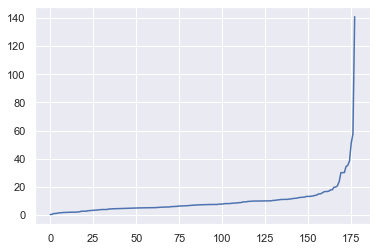

In [71]:
#Sort distances, plot, find maximum curvature as epsilon
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

^ Maximum curvature around epsilon = 30

In [72]:
#Epsilon 30 (unnormalized data!, min samples 10 b/c of 178 total wines, euclidean b/c mds)
db = DBSCAN(eps=30, min_samples=15, metric= 'euclidean')
db.fit(Xs)

DBSCAN(eps=30, min_samples=15)

In [75]:
#.labels has list of clusters and respective points
clusters = db.labels_

#set colors for two clusters
colors = ['mediumorchid','lightcyan', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

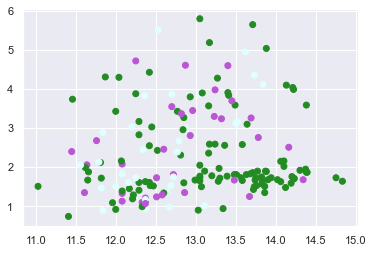

In [76]:
#Plot
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))